https://wfdb.readthedocs.io/en/latest/

https://github.com/MIT-LCP/wfdb-python/blob/main/demo.ipynb

In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm

In [2]:
def savenpy(dir,data):
    if not os.path.isdir(dir):
        os.makedirs(dir,exist_ok=True)
    np.save(dir,data)


In [3]:
DATA_ROOT = r"Z:google-wdb\matched\matched"
n = 8

### 表示とセーブ

1244 folders found
26 header files found
3485814_0002


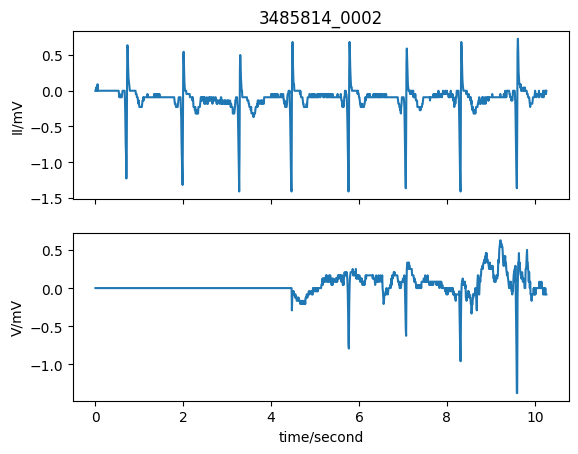

3485814_0003


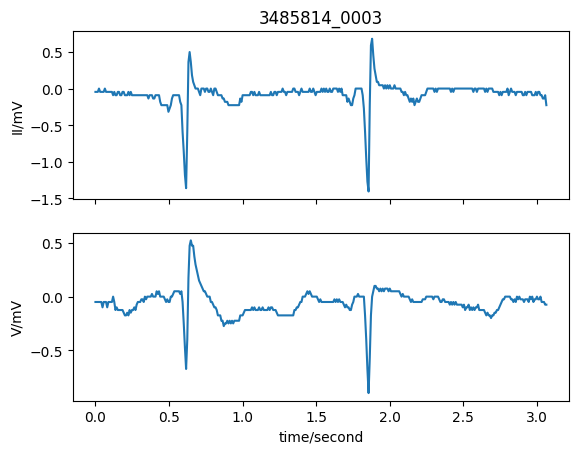

3485814_0007


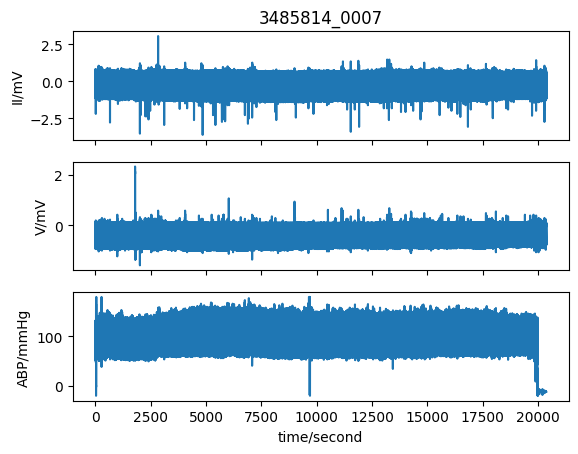

3485814_0008


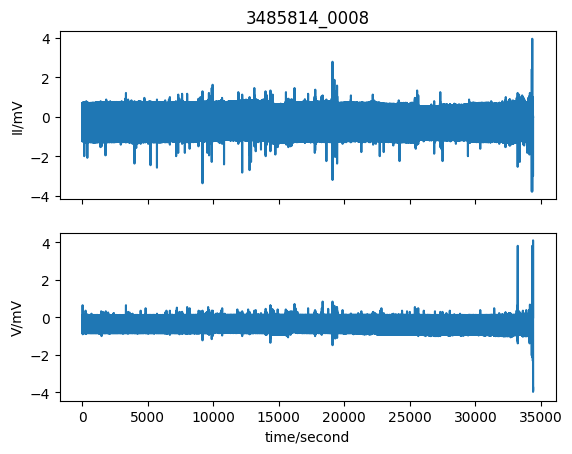

3348632_0001


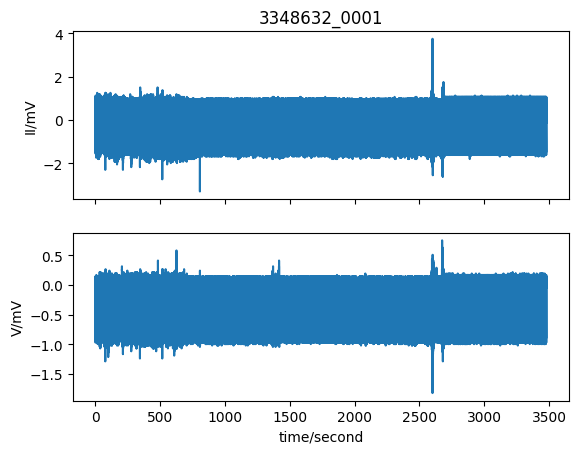

3485814_0004


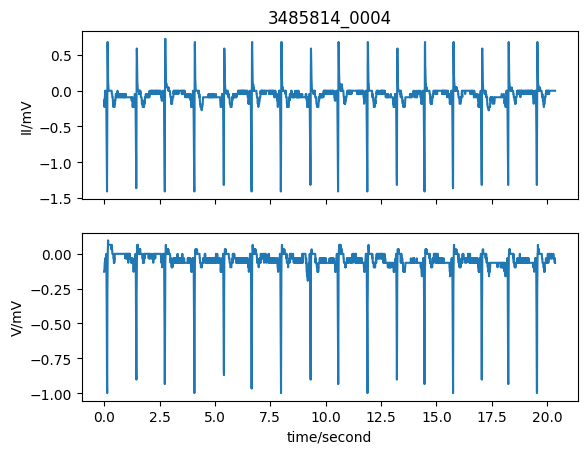

3348632_0002


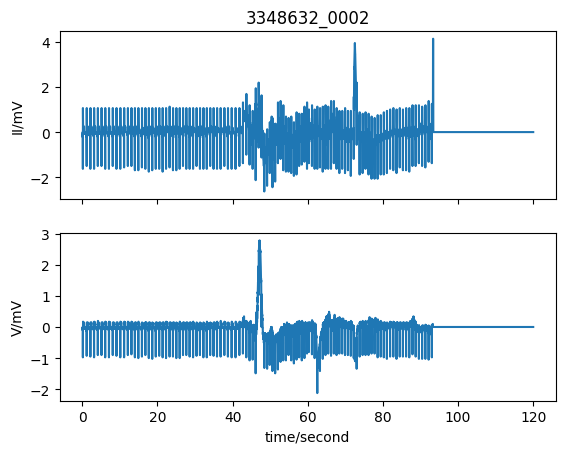

3485814_0006


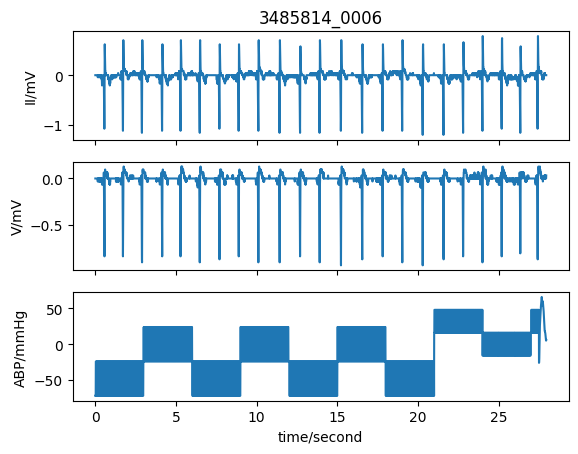

3485814_0011


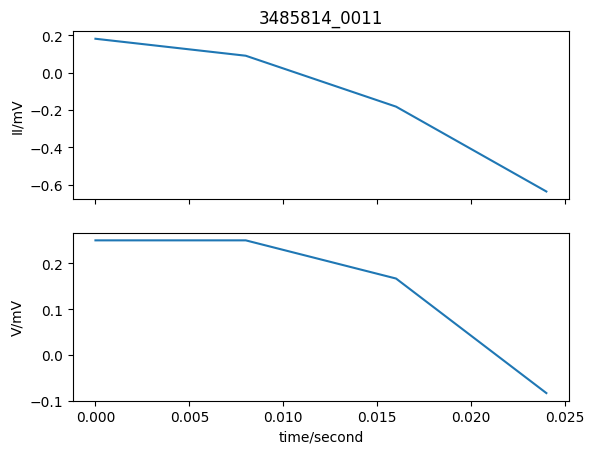

3485814_0001


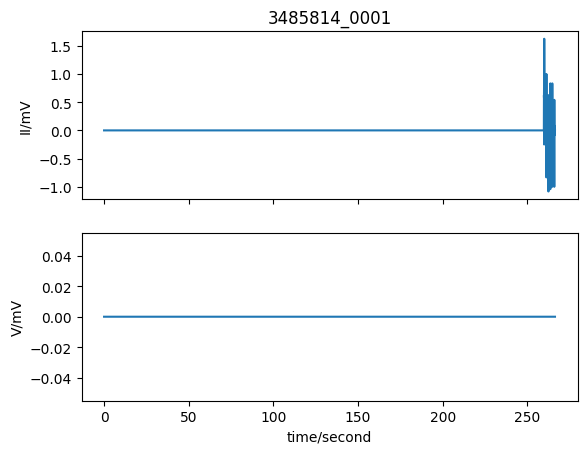

3485814_0010


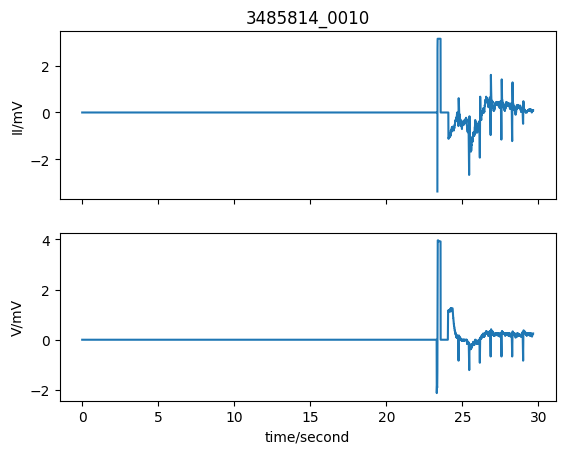

3485814_0016


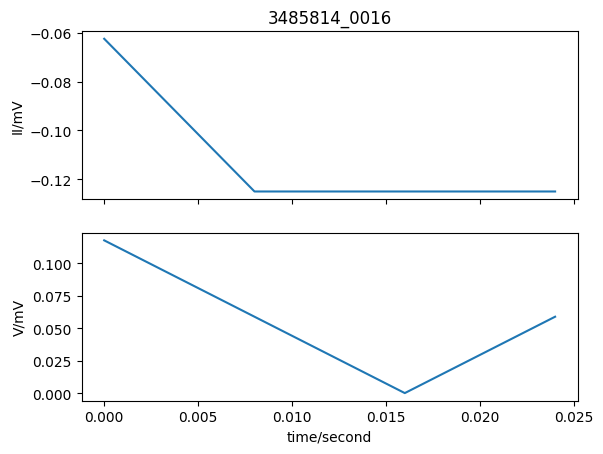

3485814_0009


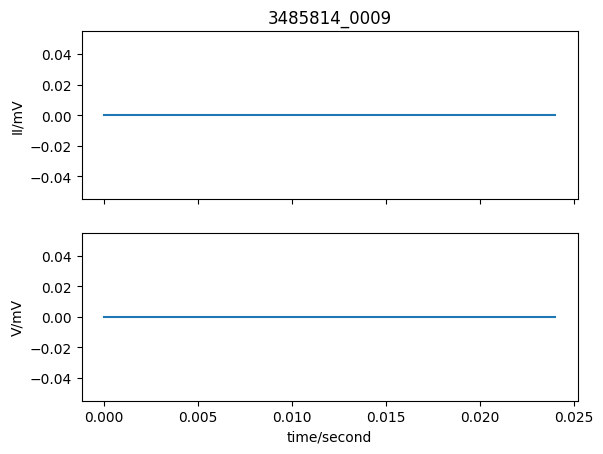

3485814_0013


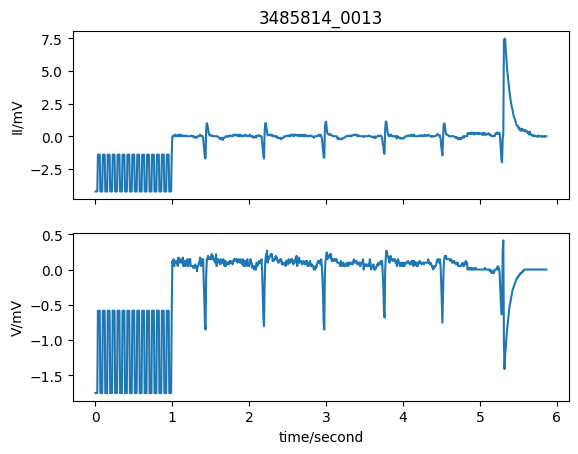

3485814_0015


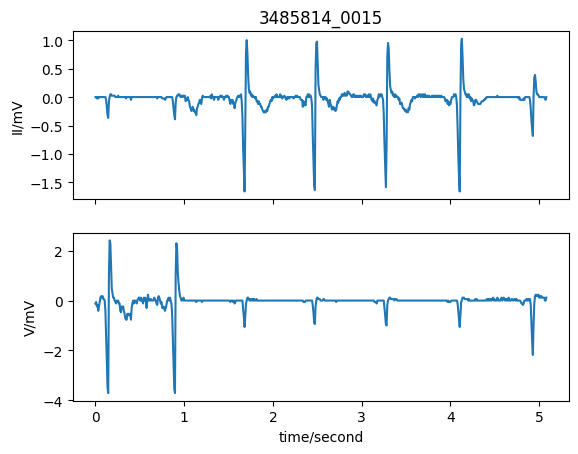

3485814_0018


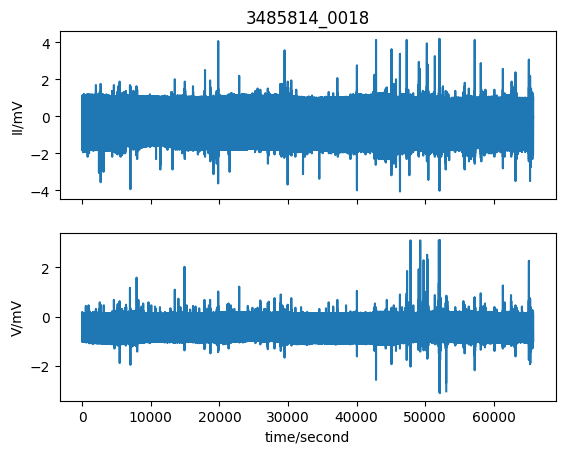

3485814_0012


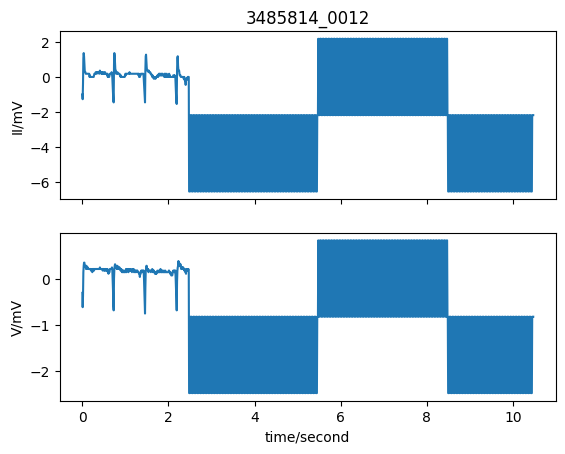

3485814_0017


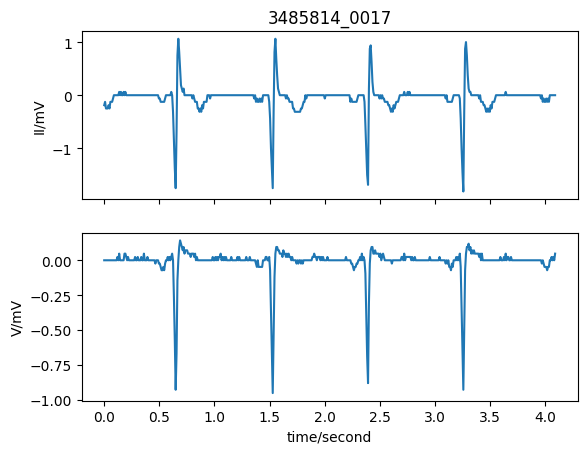

3485814_0014


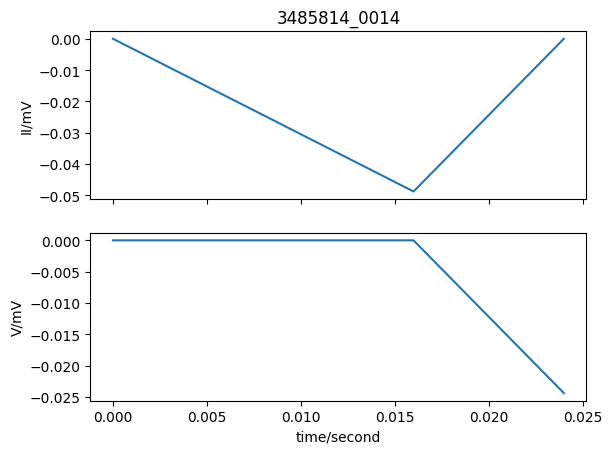

3485814_0005


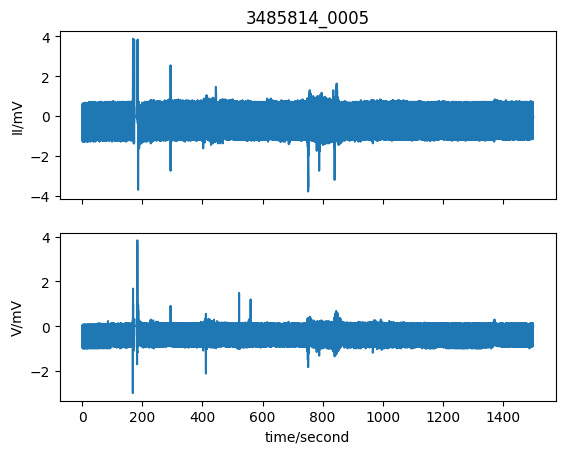

In [12]:
for i in range(8):
    folders = glob.glob(DATA_ROOT+f"/p0{i}/*")
    print(len(folders),"folders found")
    for folder in folders:
        heas = glob.glob(folder+"/*.hea")
        print(len(heas),'header files found')
        for hea in heas:
            if '_layout' in hea:
                continue
            name = os.path.splitext(os.path.basename(hea))[0]
            if name.startswith('p'):
                continue
            print(name)
            # record = wfdb.rdrecord(os.path.splitext(hea)[0],channel_names=['ABP','PLETH'])
            record = wfdb.rdrecord(os.path.splitext(hea)[0])
            # if record.n_sig < 2:
            #     continue
            wfdb.plot_wfdb(record=record, title=name)
            # display(record._dict_)
        break
    break

### ABPのないファイルを削除 (p0n 1回限り)

In [18]:
i = 8
txt = open(f"../data/raw/noabp_index/no_ABP_0{i}.txt", mode='w')
txt_ppg = open(f"../data/raw/ppgabp_index/has_PPG_ABP_0{i}.txt",mode='w')
# {p00, p01,...,p09}/*のフォルダを取得
folders = glob.glob(DATA_ROOT+f"/p0{i}/*")
print(f"p0{i}:",len(folders),"folders found")
for i in tqdm(range(len(folders))):
    # p0n/*にある x_layout.heaを取得（複数）
    layout_heas = glob.glob(folders[i]+"/*_layout.hea")
    # print(layout_heas)
    noabp_ids = []
    abp_ids = []
    for layout_hea in layout_heas:
        #id:  x_layout.hea のx
        id = os.path.basename(layout_hea)[:7]
        with open(layout_hea, mode='r') as f:
            lh  = f.read()
            # x_layout.hea (信号全部)にABPがあればabp_idsに。ないならnoabp_idsに
            if not 'ABP' in lh:
                noabp_ids.append(id)
            else:
                abp_ids.append(id)
    # print(noabp_ids,abp_ids)
    # no ABP
    # .heaの中身を見ずにno_ABP_0{i}.txtにメモ
    for id in noabp_ids:
        noabp_heas = glob.glob(folders[i]+f"\{id}_*")
        for hea in noabp_heas:
            if '_layout' in hea:
                continue
            if os.path.splitext(os.path.basename(hea))[0].startswith('p'):
                continue
            else:
                txt.write(hea[33:]+'\n')
    # has ABP
    # 各セグメント(x_00yy.hea)の中身を見て、abpがなければno_ABP_0{i}.txtにメモ
    # PLETHがあればhas_PPG_ABP_0{i}.txtにメモ
    for id in abp_ids:
        abp_heas = glob.glob(folders[i]+f"\{id}_*.hea")
        for hea in abp_heas:
            if '_layout' in hea:
                continue
            name = os.path.splitext(os.path.basename(hea))[0]
            if name.startswith('p'):
                continue
            # print(hea)
            with open(hea, mode='r') as file:
                h = file.read()
                if not 'ABP' in h:
                    txt.write(hea[33:]+'\n')
                    txt.write(hea[33:-3]+'dat\n')
                elif 'PLETH' in h:
                    txt_ppg.write(hea[33:]+'\n')
                    # txt_ppg.write(hea[49:-3]+'dat\n')
            # print()
    # heas = glob.glob(folders[i]+"/*.hea")
    # for hea in heas:
    #     if '_layout' in hea:
    #         continue
    #     name = os.path.splitext(os.path.basename(hea))[0]
    #     if name.startswith('p'):
    #         continue
    #     with open(hea, mode='r') as h:
    #         if not 'ABP' in h:
    #             txt.write(hea[49:]+'\n')
    #             txt.write(hea[49:-3]+'dat\n')
    #         elif 'PLETH' in h:
    #             txt_ppg.write(hea[49:]+'\n')
    #             txt_ppg.write(hea[49:-3]+'dat\n')
txt.close()
txt_ppg.close()


p08: 1071 folders found


100%|██████████| 1071/1071 [23:11<00:00,  1.30s/it] 


In [31]:
txt.close()
txt_ppg.close()